# Exploración: horarios_curso_anonymized

Notebook para explorar el archivo de datos de Horarios Curso.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline


In [2]:
df = pd.read_parquet('../data/horarios_curso_anonymized.parquet')


In [3]:
print(f"Dimensiones: {df.shape}")
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")
print(f"\nMemoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Dimensiones: (444834, 16)
Número de filas: 444,834
Número de columnas: 16

Memoria utilizada: 186.67 MB


## Sobre Este Dataset

El dataset contiene 444,834 registros y 16 variables: 8 numéricas (1 int64, 7 int8) y 8 categóricas (object). Tamaño en memoria: 186.

Este volumen de datos nos proporciona una base sólida para identificar patrones de comportamiento y construir perfiles de estudiantes que permitan recomendaciones personalizadas de carga académica.


In [4]:
print("\nColumnas:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col} ({df[col].dtype})")



Columnas:
 1. PERIODO (int64)
 2. CRN (object)
 3. CODIGO_CURSO (object)
 4. SECCION (object)
 5. FECHA_INICIO_FRANJA (object)
 6. FECHA_FIN_FRANJA (object)
 7. HORA_INICIO_FRANJA (object)
 8. HORA_FIN_FRANJA (object)
 9. CODIGO_SALON (object)
10. LUNES (int8)
11. MARTES (int8)
12. MIERCOLES (int8)
13. JUEVES (int8)
14. VIERNES (int8)
15. SABADO (int8)
16. DOMINGO (int8)


In [5]:
df.head()


,PERIODO,CRN,CODIGO_CURSO,SECCION,FECHA_INICIO_FRANJA,FECHA_FIN_FRANJA,HORA_INICIO_FRANJA,HORA_FIN_FRANJA,CODIGO_SALON,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
0,202520,CRN_00021426,CRS_00020856,1,2025-08-04,2025-09-27,0800,0920,LL_301,1,0,0,1,0,0,0
1,201720,CRN_00025512,CRS_00000005,1,2017-09-14,2017-09-14,0630,1120,SD_702,0,0,0,1,0,0,0
2,201910,CRN_00000991,CRS_00003329,1,2019-01-21,2019-05-11,1700,1820,GA_302,1,0,0,0,0,0,0
3,201910,CRN_00034757,CRS_00000366,2,2019-01-21,2019-05-11,0930,1050,R_209,1,0,1,0,0,0,0
4,201910,CRN_00039498,CRS_00012290,1,2019-01-21,2019-05-11,1100,1350,NOREQ,0,1,0,0,0,0,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444834 entries, 0 to 444833
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   PERIODO              444834 non-null  int64 
 1   CRN                  444834 non-null  object
 2   CODIGO_CURSO         444834 non-null  object
 3   SECCION              444834 non-null  object
 4   FECHA_INICIO_FRANJA  368377 non-null  object
 5   FECHA_FIN_FRANJA     368377 non-null  object
 6   HORA_INICIO_FRANJA   326477 non-null  object
 7   HORA_FIN_FRANJA      326477 non-null  object
 8   CODIGO_SALON         326121 non-null  object
 9   LUNES                444834 non-null  int8  
 10  MARTES               444834 non-null  int8  
 11  MIERCOLES            444834 non-null  int8  
 12  JUEVES               444834 non-null  int8  
 13  VIERNES              444834 non-null  int8  
 14  SABADO               444834 non-null  int8  
 15  DOMINGO              444834 non-nu

## Tipos de Datos y Su Significado

Cada tipo de dato nos dice cómo podemos usar la variable:

- **object**: Texto o categorías. Útil para agrupar estudiantes por características cualitativas.
- **int64/float64**: Números que podemos sumar, promediar o usar en cálculos matemáticos.
- **bool**: Verdadero o falso. Perfecto para marcar eventos específicos (entró en suspensión, aprobó materia, etc.).

La combinación de estos tipos nos permite analizar tanto patrones cuantitativos (promedios, créditos) como cualitativos (programa académico, estado).


In [7]:
df.describe()


,PERIODO,LUNES,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
count,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000
mean,201551.878492,0.178716,0.210505,0.206124,0.222802,0.210935,0.077926,0.004678
std,716.262294,0.383115,0.407668,0.404521,0.416127,0.407973,0.268055,0.068237
min,199019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,201710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202612.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print("\nValores nulos por columna:")
null_counts = df.isnull().sum()
null_pct = (null_counts / len(df) * 100).round(2)
null_df = pd.DataFrame({'Nulos': null_counts, 'Porcentaje': null_pct})
print(null_df[null_df['Nulos'] > 0].sort_values('Nulos', ascending=False))



Valores nulos por columna:
                      Nulos  Porcentaje
CODIGO_SALON         118713       26.69
HORA_FIN_FRANJA      118357       26.61
HORA_INICIO_FRANJA   118357       26.61
FECHA_INICIO_FRANJA   76457       17.19
FECHA_FIN_FRANJA      76457       17.19


## ¿Qué Hacer con los Datos Faltantes?

Los valores nulos nos obligan a tomar decisiones estratégicas:

**Cuando más del 50% de datos faltan:** La variable probablemente no aporta información útil para la mayoría de estudiantes. Es mejor descartarla que intentar llenar tantos huecos.

**Cuando faltan entre 10-50%:** Debemos investigar por qué faltan. ¿Es información que no se recolectaba antes? ¿No aplica para ciertos programas? La respuesta guía si imputamos, descartamos o creamos categorías especiales.

**Cuando faltan menos del 10%:** Generalmente podemos rellenar con valores típicos (la mediana para números, la moda para categorías) sin distorsionar significativamente el análisis.


In [9]:
#profile = ProfileReport(df, title="Reporte de Profiling - Horarios Curso", minimal=False)


## Análisis Univariado - Variables Categóricas

In [10]:
cat_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print(f"Variables categóricas encontradas: {len(cat_cols)}")
print(cat_cols)


Variables categóricas encontradas: 8
['CRN', 'CODIGO_CURSO', 'SECCION', 'FECHA_INICIO_FRANJA', 'FECHA_FIN_FRANJA', 'HORA_INICIO_FRANJA', 'HORA_FIN_FRANJA', 'CODIGO_SALON']


## Distribuciones Categóricas: Qué Revelan

Las gráficas de barras nos muestran si las categorías están balanceadas o sesgadas:

**Distribuciones muy desbalanceadas** (una categoría domina con >80%): La variable tiene poco poder discriminante. Casi todos los casos caen en la misma categoría, así que no nos ayuda a diferenciar perfiles.

**Distribuciones moderadamente desbalanceadas** (una categoría entre 50-80%): Todavía útil pero debemos ser cuidadosos. Las categorías minoritarias podrían tener patrones importantes que se pierden si solo miramos promedios generales.

**Distribuciones equilibradas** (categorías similares en frecuencia): Ideal para análisis. Cada grupo tiene suficientes casos para identificar patrones confiables.


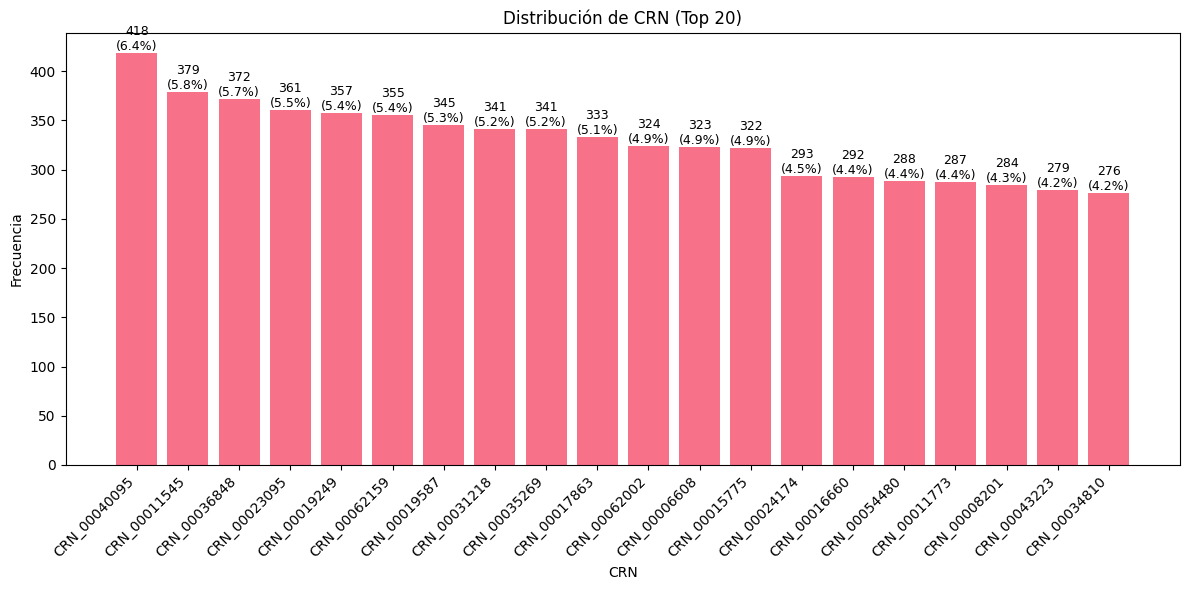

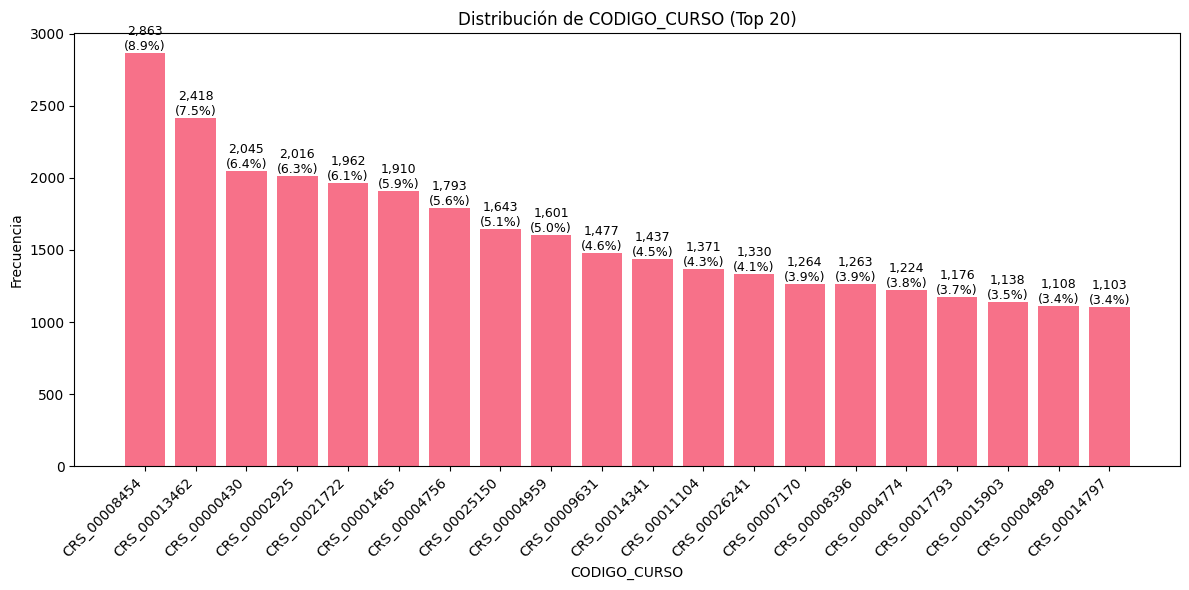

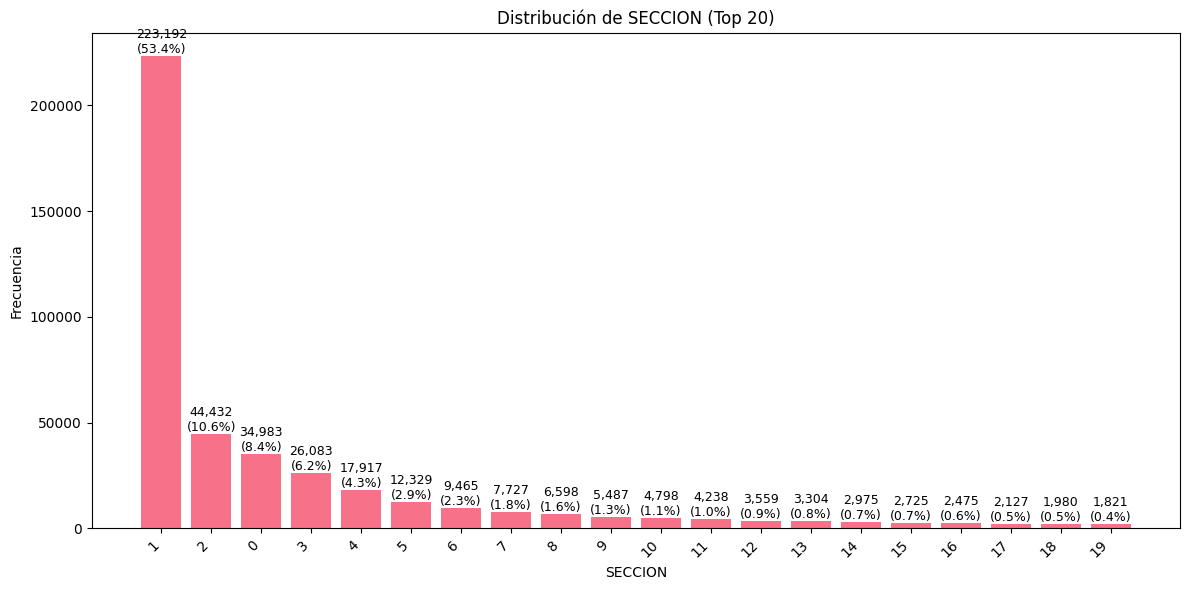

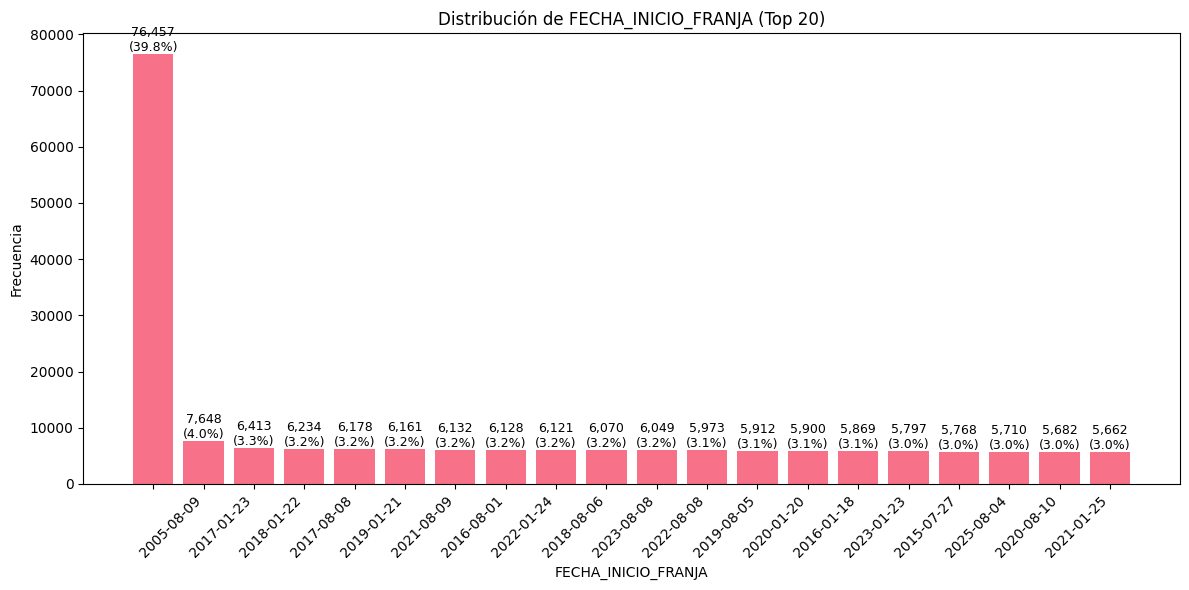

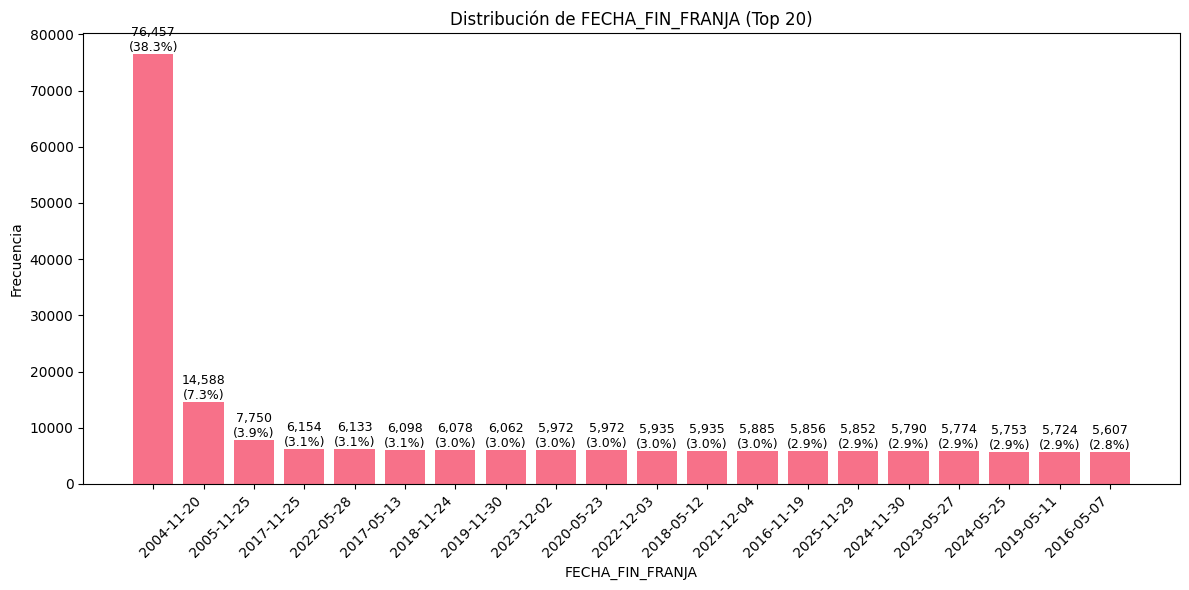

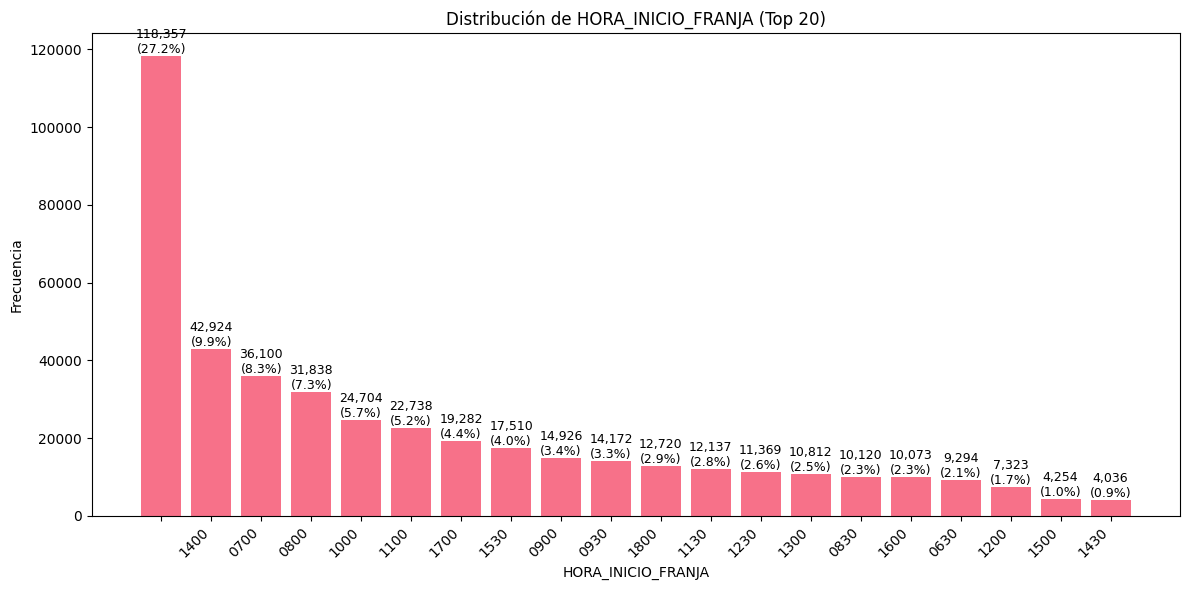

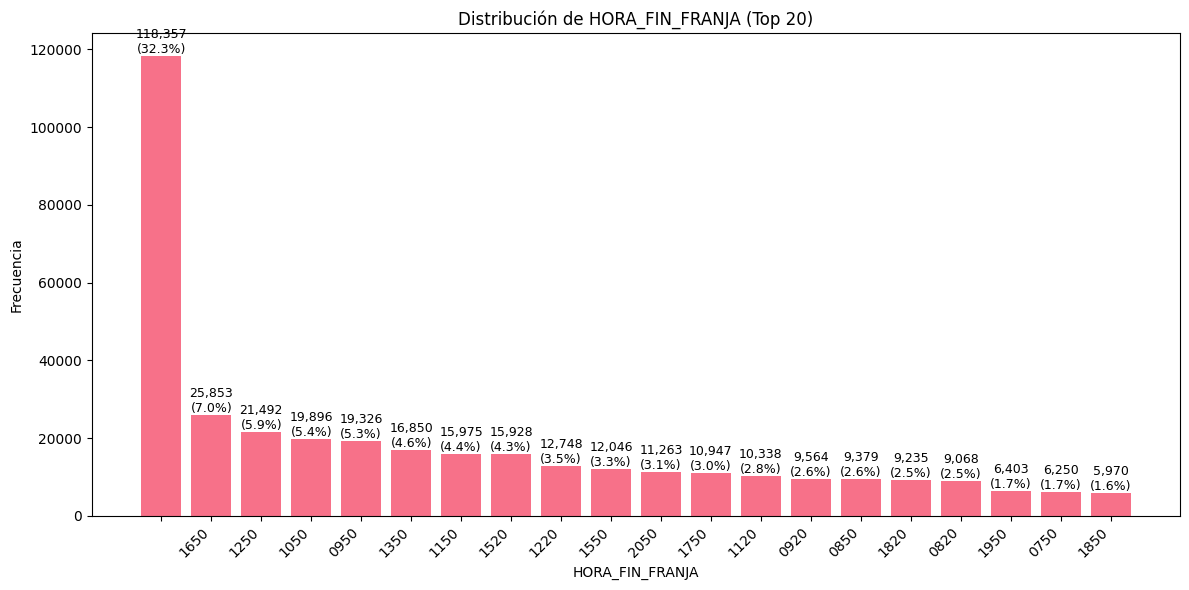

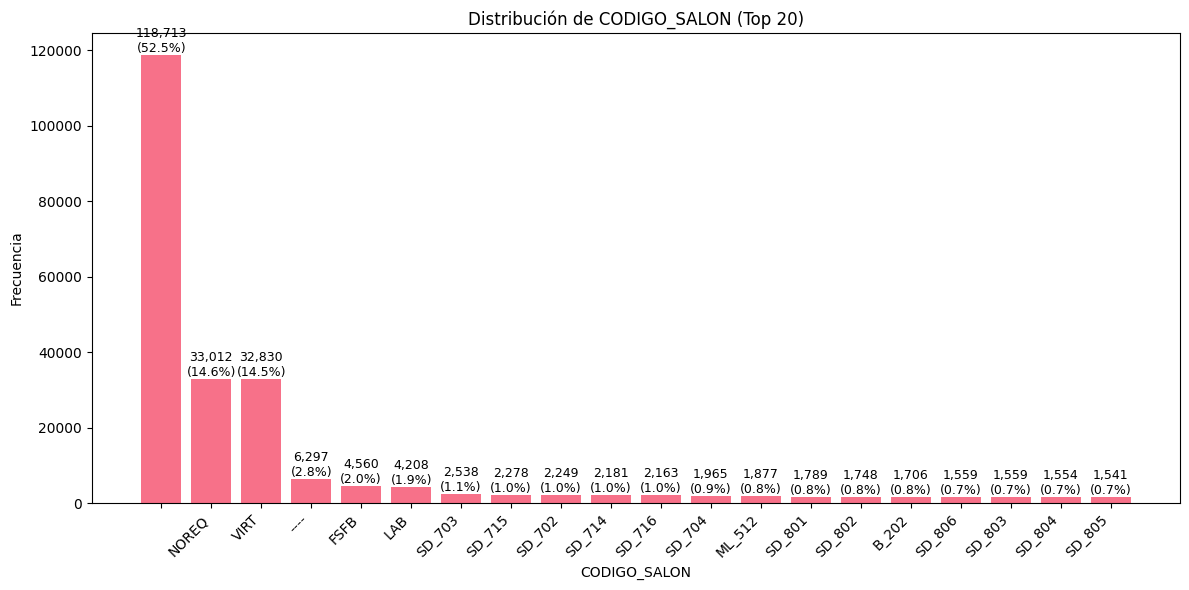

In [11]:
for col in cat_cols:
    value_counts = df[col].value_counts(dropna=False)
    if len(value_counts) > 20:
        value_counts = value_counts.head(20)
        title_suffix = " (Top 20)"
    else:
        title_suffix = ""
    percentages = (value_counts / value_counts.sum() * 100)
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(range(len(value_counts)), value_counts.values)
    for i, (bar, count, pct) in enumerate(zip(bars, value_counts.values, percentages.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9)
    ax.set_title(f'Distribución de {col}{title_suffix}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Hallazgos Clave en las Variables

Del análisis de las distribuciones anteriores, identificamos:

**PERIODO:** Media en 201551, cubriendo desde 199019 hasta 202612. Distribución amplia de periodos académicos.

**CRN:** Código de referencia del curso. Permite vincular con dataset de historial de materias para análisis integrado.

**CODIGO_CURSO:** Identifica el curso específico. Variable clave para asociar horarios con materias en el sistema de recomendación.

**SECCION:** Número de sección del curso. Múltiples secciones del mismo curso pueden tener horarios diferentes, importante para recomendaciones considerando conflictos horarios.

**FECHA_INICIO_FRANJA / FECHA_FIN_FRANJA:** Definen duración del curso. 17% nulos. Útil para identificar cursos de ciclo completo vs parcial.

**HORA_INICIO_FRANJA / HORA_FIN_FRANJA:** Horarios de clase. 26.61% nulos. Variable crítica para detectar conflictos horarios al recomendar combinaciones de materias. Sistema debe evitar recomendar materias que se traslapen temporalmente.

**CODIGO_SALON:** Identifica el salón físico. 26.69% nulos probablemente por cursos virtuales o sin asignación aún. Puede usarse para considerar distancias entre clases consecutivas.

**Variables de días (LUNES a DOMINGO):** Variables binarias (0/1) indicando días de clase. Distribución: Jueves (22.3%), Martes (21.1%), Viernes (21.1%), Miércoles (20.6%), Lunes (17.9%), Sábado (7.8%), Domingo (0.5%). Para clusterización jerárquica y recomendaciones: importante considerar patrones de distribución semanal para evitar sobrecargas en días específicos.



## Análisis Univariado - Variables Numéricas

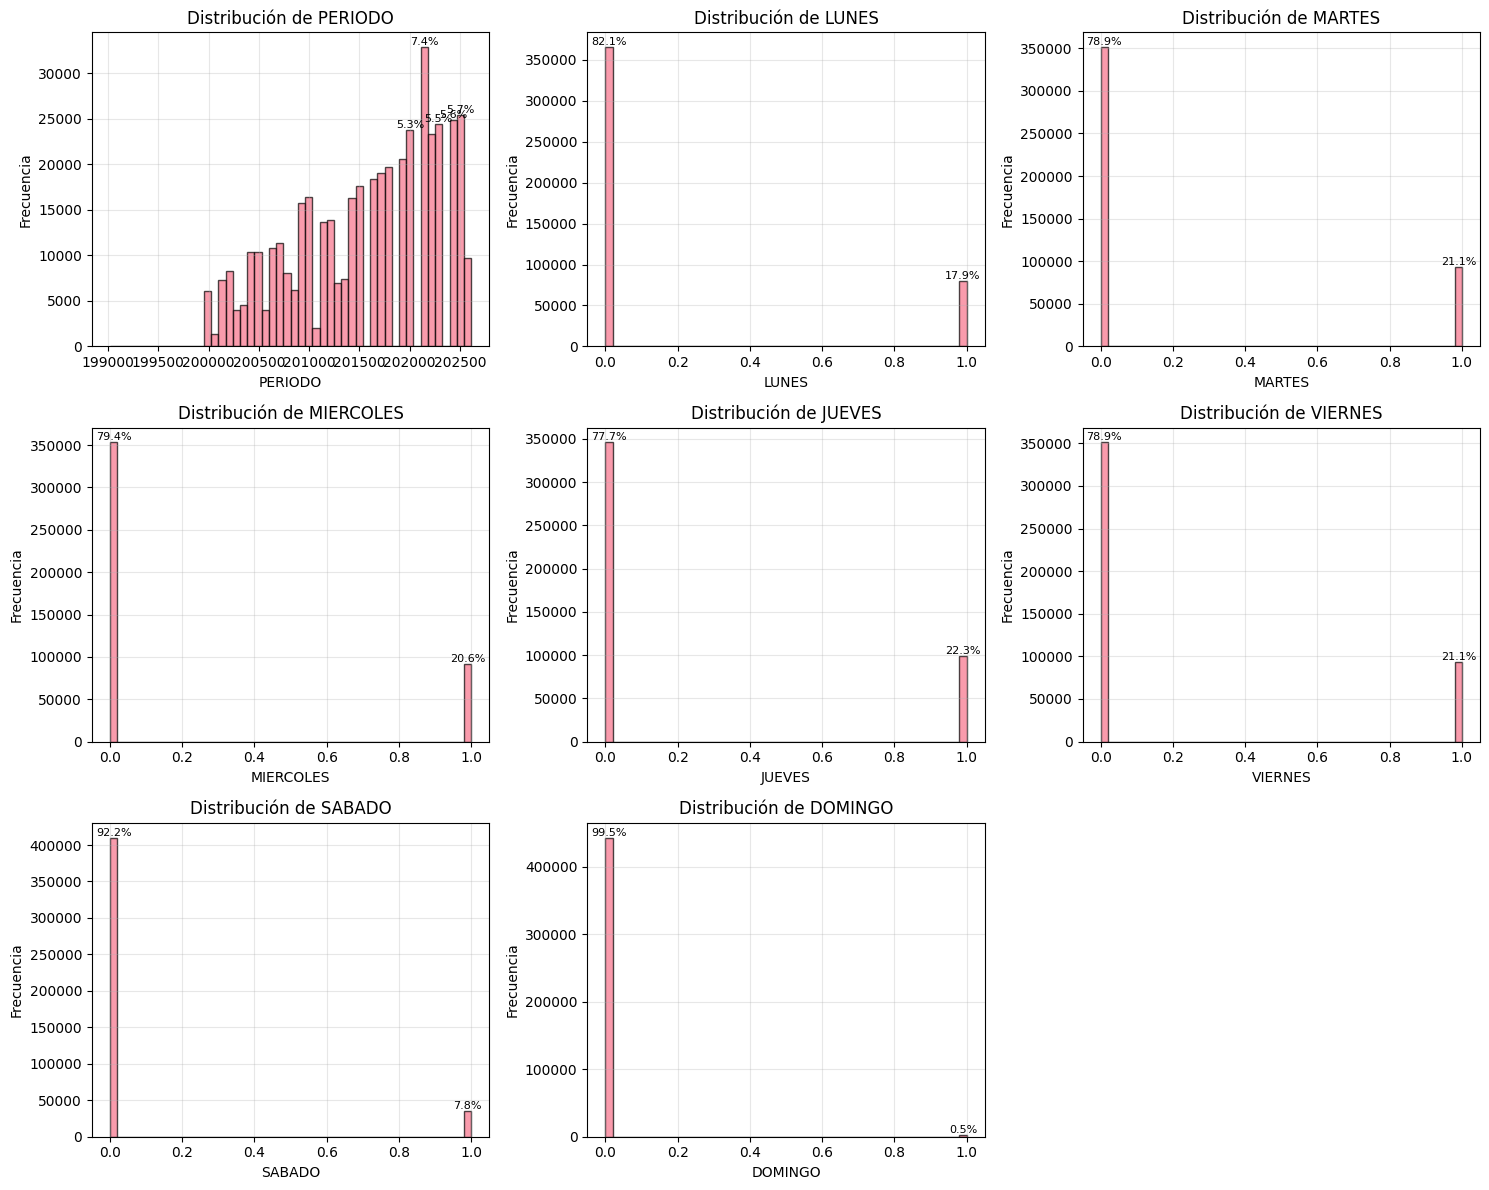

In [12]:
num_cols = df.select_dtypes(include=['int16', 'int32', 'int64', 'int8', 'float16', 'float32', 'float64']).columns.tolist()
if len(num_cols) > 0:
    n_cols = 3
    n_rows = (len(num_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if len(num_cols) > 1 else [axes]
    for idx, col in enumerate(num_cols):
        data = df[col].dropna()
        n, bins, patches = axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7)
        total = len(data)
        bin_heights = list(zip(n, range(len(n))))
        bin_heights.sort(reverse=True)
        top_bins = bin_heights[:min(5, len(bin_heights))]
        for height, bin_idx in top_bins:
            if height > 0:
                pct = (height / total) * 100
                bin_center = (bins[bin_idx] + bins[bin_idx + 1]) / 2
                axes[idx].text(bin_center, height, f'{pct:.1f}%',
                             ha='center', va='bottom', fontsize=8)
        axes[idx].set_title(f'Distribución de {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)
    for idx in range(len(num_cols), len(axes)):
        axes[idx].set_visible(False)
    plt.tight_layout()
    plt.show()
    
else:
    print("No hay suficientes variables.")

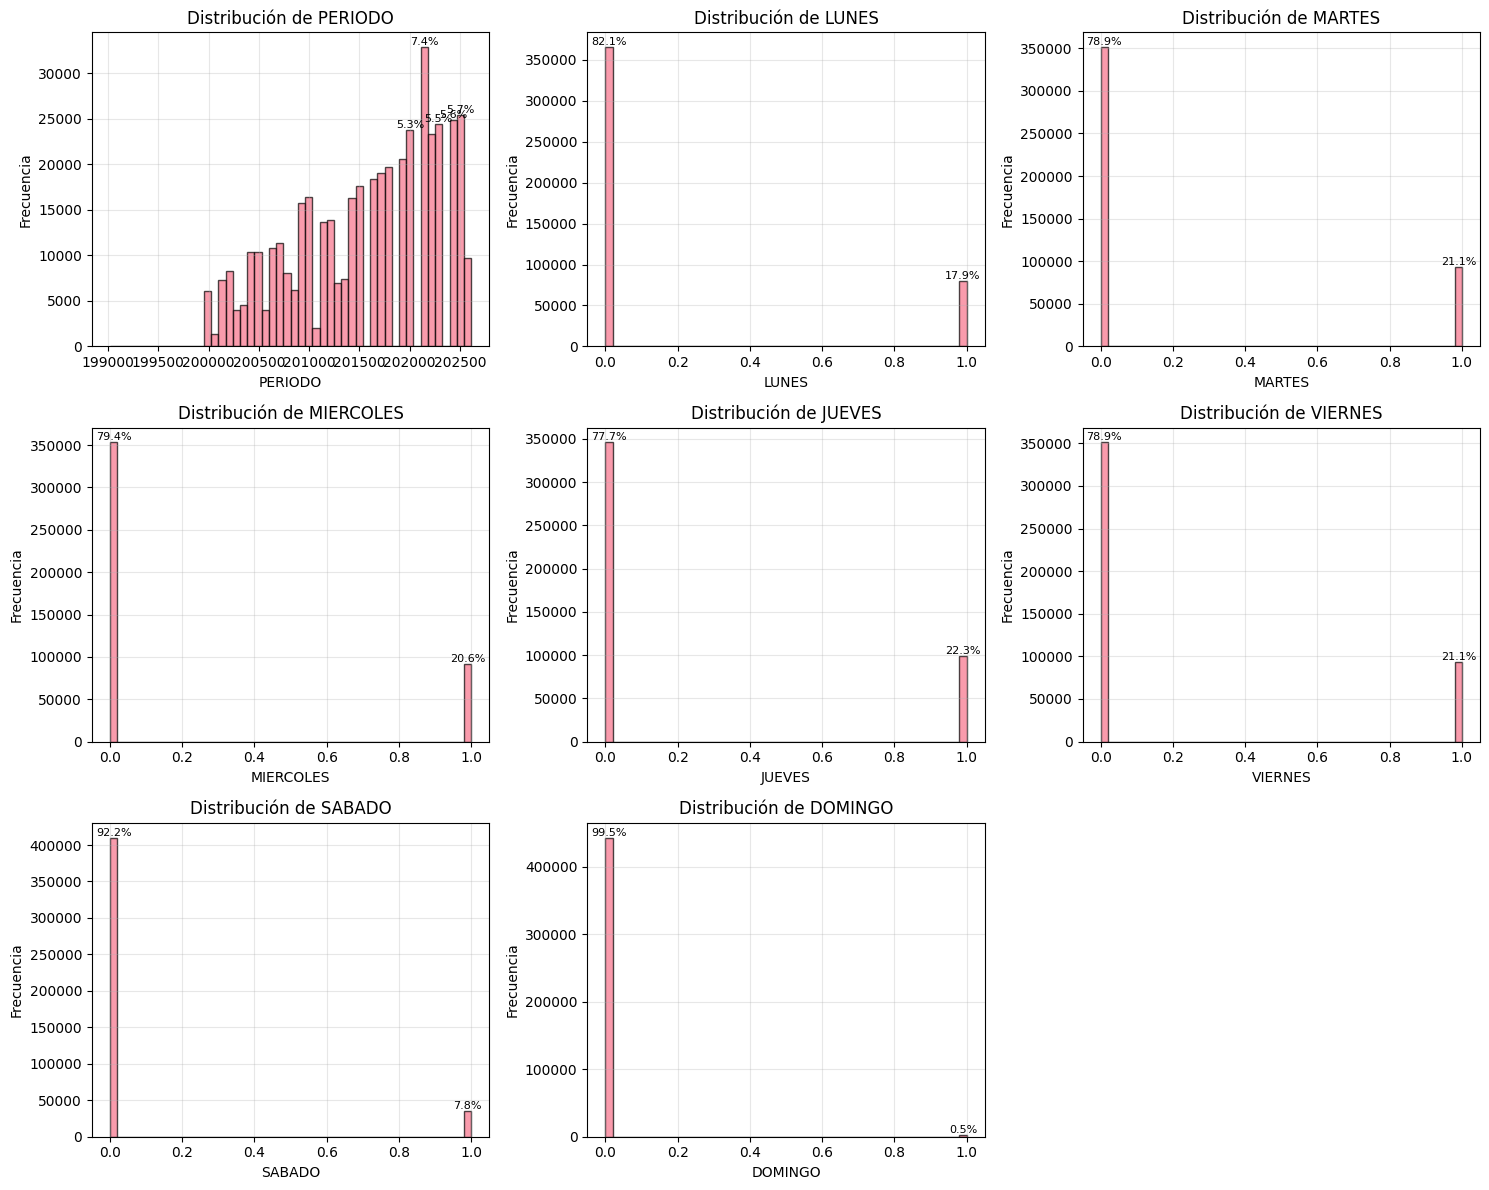

In [13]:
if len(num_cols) > 0:
    n_cols = 3
    n_rows = (len(num_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if len(num_cols) > 1 else [axes]
    for idx, col in enumerate(num_cols):
        data = df[col].dropna()
        n, bins, patches = axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7)
        total = len(data)
        bin_heights = list(zip(n, range(len(n))))
        bin_heights.sort(reverse=True)
        top_bins = bin_heights[:min(5, len(bin_heights))]
        for height, bin_idx in top_bins:
            if height > 0:
                pct = (height / total) * 100
                bin_center = (bins[bin_idx] + bins[bin_idx + 1]) / 2
                axes[idx].text(bin_center, height, f'{pct:.1f}%',
                             ha='center', va='bottom', fontsize=8)
        axes[idx].set_title(f'Distribución de {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)
    for idx in range(len(num_cols), len(axes)):
        axes[idx].set_visible(False)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes variables.")

## Interpretando las Distribuciones Numéricas

Los histogramas nos revelan la forma en que se distribuyen los valores:

**Distribución normal (campana):** Los valores se concentran alrededor del promedio y disminuyen hacia los extremos. Típico en variables como calificaciones o promedios.

**Distribución sesgada (cola larga):** La mayoría tiene valores bajos o altos, con pocos casos extremos. Común en variables como número de suspensiones (la mayoría tiene cero, pocos tienen muchas).

**Distribución uniforme (plana):** Los valores se distribuyen parejos. Puede indicar una variable artificial o que agrupa casos de manera equilibrada en el tiempo.

**Valores atípicos:** Puntos muy alejados del grueso pueden ser errores de captura o casos excepcionales que merecen investigación aparte.


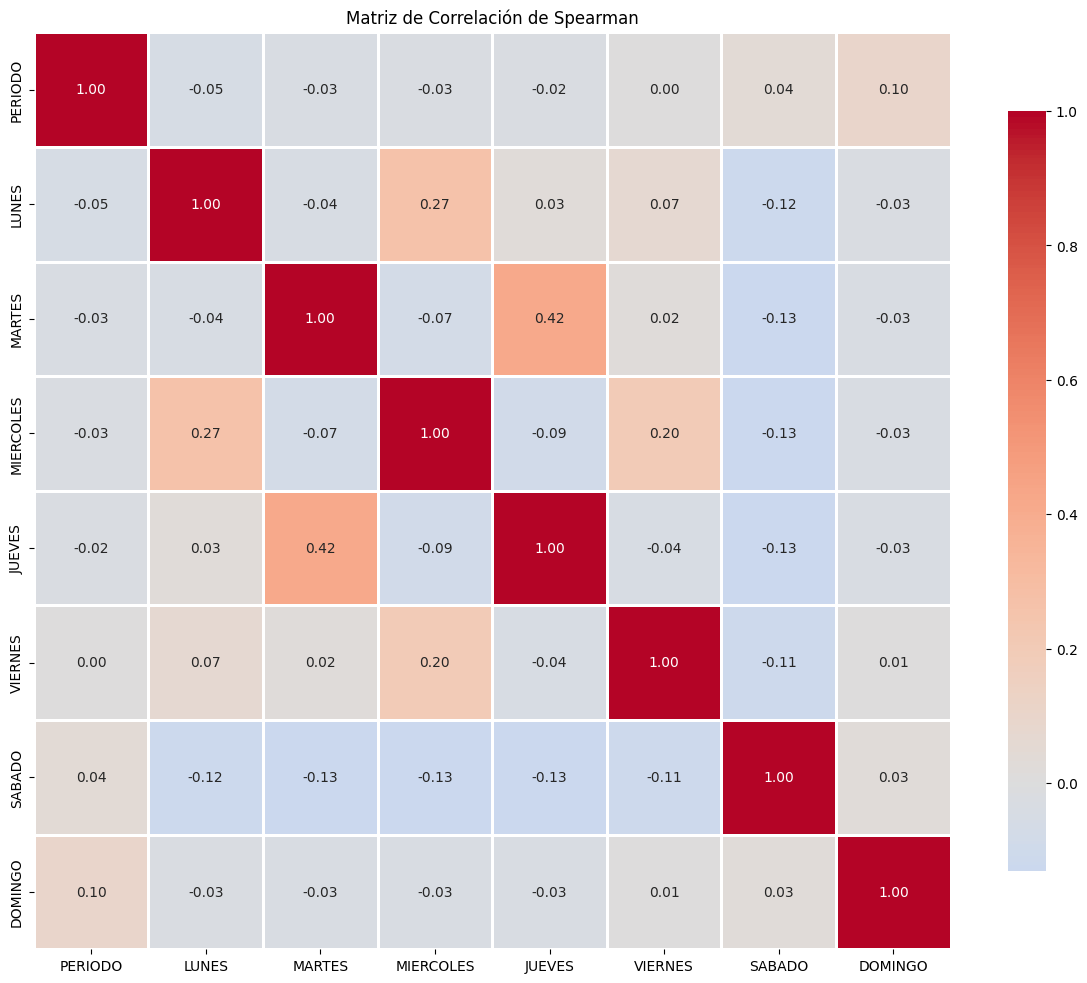

In [14]:
if len(num_cols) > 1:
    corr_matrix = df[num_cols].corr(method='spearman')
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación de Spearman')
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes variables.")

## Análisis Multivariado - Pairplot

## Relaciones Entre Variables

Las variables de días de semana no muestran correlaciones fuertes entre sí, sugiriendo que la programación de cursos distribuye las clases de manera relativamente independiente entre días. PERIODO no correlaciona fuertemente con ninguna variable horaria.

**¿Por qué importan las correlaciones?**

- **Correlaciones esperadas** (como periodo_inicial y periodo_final): Validan que los datos tienen sentido interno.

- **Correlaciones inesperadas**: Pueden revelar relaciones causales o confusiones que debemos investigar.

- **Falta de correlaciones**: Nos dice que las variables aportan información independiente, útil para construir un modelo robusto sin redundancia.


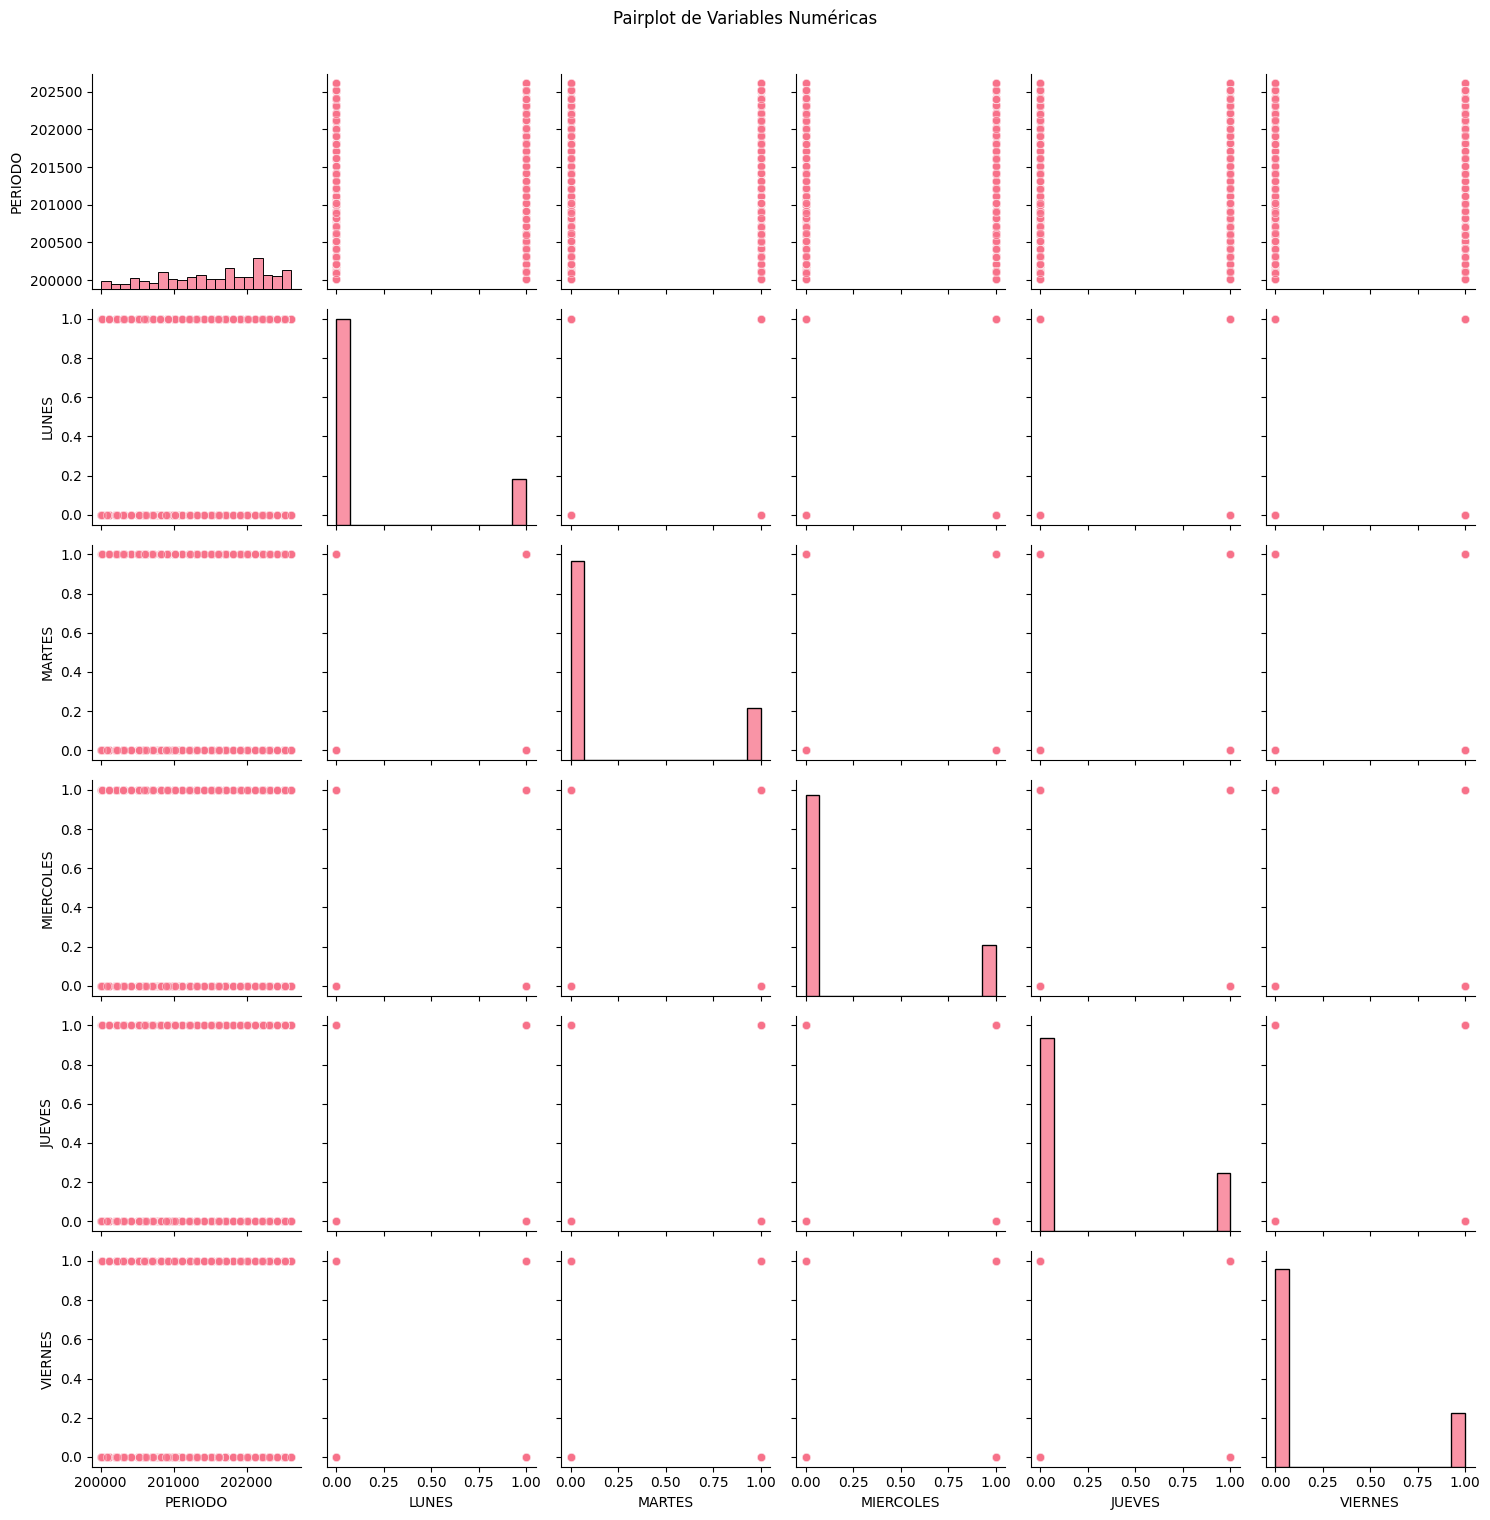

In [15]:
if len(num_cols) > 1:
    cols_to_plot = num_cols[:6]
    sample_size = min(5000, len(df))
    df_sample = df[cols_to_plot].sample(n=sample_size, random_state=42)
    sns.pairplot(df_sample, diag_kind='hist', plot_kws={'alpha': 0.6})
    plt.suptitle('Pairplot de Variables Numéricas', y=1.01)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes variables.")

## Análisis Multivariado - Variables Categóricas

## Visualización Multivariada: El Panorama Completo

El pairplot nos permite ver todas las combinaciones de variables numéricas simultáneamente:

**Los diagonales** muestran la distribución individual de cada variable (histogramas).

**Los gráficos de dispersión** revelan relaciones entre pares de variables:
- Puntos formando una línea = correlación fuerte
- Puntos en grupos = clusters naturales (¡exactamente lo que buscamos para el proyecto!)
- Puntos dispersos sin patrón = variables independientes

Esta visualización es especialmente útil para identificar si existen grupos naturales de estudiantes que podríamos usar como base para el clustering jerárquico.


In [16]:
cat_cols_filtered = [col for col in cat_cols if df[col].nunique() < 20][:3]
if len(cat_cols_filtered) >= 2:
    for i in range(len(cat_cols_filtered)):
        for j in range(i+1, len(cat_cols_filtered)):
            col1, col2 = cat_cols_filtered[i], cat_cols_filtered[j]
            crosstab = pd.crosstab(df[col1], df[col2], margins=True)
            crosstab_no_margins = pd.crosstab(df[col1], df[col2])
            plt.figure(figsize=(10, 6))
            sns.heatmap(crosstab_no_margins, annot=True, fmt='d', cmap='YlOrRd')
            plt.title(f'Heatmap: {col1} vs {col2}')
            plt.tight_layout()
            plt.show()
else:
    print("No hay suficientes variables.")

No hay suficientes variables.


## Conclusiones del Análisis Exploratorio

### Variables con nulos significativos

26% de registros sin información completa de horario/salón. Requiere tratamiento especial: pueden ser cursos virtuales o datos incompletos.

### Utilidad para recomendaciones

Este dataset es complementario al sistema de recomendación principal. Permite: (1) validar que materias recomendadas no tengan conflictos horarios, (2) considerar distribución de carga durante la semana, (3) optimizar trayectos físicos entre clases.

### Patrones temporales

Jueves es el día más utilizado (22.3%), Domingo casi no se usa (0.5%). Clases de sábado son minoritarias (7.8%), probablemente programas especiales o posgrados.

### Estrategia recomendada

(1) Usar como filtro post-clusterización para validar viabilidad de combinaciones recomendadas; (2) Identificar patrones de carga horaria por carrera; (3) Considerar cursos sin horario definido como opciones flexibles; (4) Al recomendar número de créditos, validar que existan horarios compatibles disponibles para las materias sugeridas.

### Impacto para el Proyecto

Este análisis exploratorio nos permite:

1. **Identificar qué variables usar**: Sabemos cuáles aportan información útil y cuáles descartar.
2. **Detectar problemas de calidad**: Valores nulos, atípicos y desbalances que debemos corregir.
3. **Entender las relaciones**: Cómo las variables se relacionan entre sí y con el rendimiento académico.
4. **Validar viabilidad**: Confirmar que existen patrones diferenciables que justifican el clustering.

Los insights obtenidos guiarán las decisiones de preprocesamiento y la construcción del modelo de recomendaciones académicas.
